# GivingTuesday Technical Assignment

### Farhan Sakif (farhan.sakif@gmail.com)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("21eoextractez.xlsx")

In [3]:
df.head()

,efile,EIN,taxpd,subseccd,totcntrbs,prgmservrev,duesassesmnts,othrinvstinc,grsamtsalesastothr,basisalesexpnsothr,...,excds1pct509,subtotpub509,pubsupplesssub509,samepubsuppsubtot509,grsinc509,unreltxincls511tx509,subtotsuppinc509,netincunreltd509,othrinc509,totsupp509
0,P,10015091,201912,3,113143,0,0,196,0,0,...,0,0,594978,594978,411,0,411,0,0,595388
1,E,10017496,202012,3,30341,41389,36625,1133,8067,8196,...,0,0,587783,587783,5640,0,5640,0,0,593423
2,P,10018605,201912,5,0,0,83949,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,P,10027747,202003,8,0,20,0,2992,147,0,...,0,0,0,0,0,0,0,0,0,0
4,E,10027747,202103,8,0,35,0,649,0,0,...,0,0,0,0,0,0,0,0,0,0


## Quickly characterize the grain of the data 

- Declaring the grain involves describing in detail what the data table records signify (level of measurement of the data stored).  Examples of declarations of the grain include weekly inventory counts of every item sold in every store or an individual transaction against an insurance policy. 

- The dataset that is mainly being looked at for this assignment are the Exempt Organization Returns Filed in Calendar Year 2021 (form 990-EZ Extract).

- For these datasets, the rows in the IRS extract dataset can be characterized by the EIN (employer identification number) column where each row contains financial information related to the company such as total revenue, total expenses, gross sales of inventory etc. Similarly the EOBMF datasets also can be characterized by the EIN number and name of the organization where each row in the dataset contains exempt organization information. According to the documentation, the dataset is a cumulative file.

## Characterizing the broad categories of data

- The IRS extract dataset can be broadly categorized as containing financial information of the companies present in the data. Categories of information include income statement based data such as information about revenue, expenses and net profit, balance sheet based data such as assets and liabilities and data based on cash flows that highlights operating activities, investment activities and financing activities

## Defining a business problem

Non-profit organizations usually have a mission statement that has to do with bettering the world we live in. So while being profitable might not be the main focus of such organizations, having strong financial controls and procedures can significantly help in reaching organizations' goals. The IRS data provides an in depth look at the financial workings of non-profit organizations and with the context of the work done by GivingTuesday, an interesting business problem can be one that looks at the financial data of these organizations to get a better picture into the overall health and business dealings of the non-profit organizations. In other words, this data can possibly help answer questions such as how effective the non-profits present in this dataset are at achieving their mission statement.

It can be assumed that non-profits that run efficiently are the ones that turns majority of their contributions received, donations and other funds towards their mission statement whereas poorly run organizations take practice in exorbitant expenses that result in a smaller percentage of their funds to actually help people and causes

With this in mind, the next obvious question is how do we exactly define a healthy non-profit organization?

- I would argue a good place to start is to look at their revenue and expenses statistics
- Another place that could be looked at is the gross profit from sales of inventory column as well as from my understanding that is a good measure of to what extent the non-profit in question is self-sustainable.

In [4]:
df.describe()

,EIN,taxpd,subseccd,totcntrbs,prgmservrev,duesassesmnts,othrinvstinc,grsamtsalesastothr,basisalesexpnsothr,gnsaleofastothr,...,excds1pct509,subtotpub509,pubsupplesssub509,samepubsuppsubtot509,grsinc509,unreltxincls511tx509,subtotsuppinc509,netincunreltd509,othrinc509,totsupp509
count,2.187330e+05,218733.000000,218733.000000,218733.000000,2.187330e+05,218733.000000,218733.000000,2.187330e+05,2.187330e+05,2.187330e+05,...,2.187330e+05,2.187330e+05,2.187330e+05,2.187330e+05,2.187330e+05,218733.000000,2.187330e+05,218733.000000,2.187330e+05,2.187330e+05
mean,5.047102e+08,201992.203787,3.852107,29564.845963,1.205092e+04,8318.163629,768.202027,8.419942e+02,7.082453e+02,1.337478e+02,...,9.645715e+02,2.838895e+03,1.290203e+05,1.318906e+05,9.584738e+02,24.291652,1.055297e+03,232.180768,1.142479e+03,1.343206e+05
std,2.599693e+08,86.194726,2.317456,42406.423637,2.888428e+04,23629.374675,4632.582477,2.461326e+04,2.492900e+04,5.281746e+03,...,1.682892e+04,6.018474e+04,1.314476e+06,1.316675e+06,1.102002e+04,1468.615687,1.280555e+04,6768.902061,3.379314e+04,1.318907e+06
min,1.001509e+07,199112.000000,2.000000,-660032.000000,-1.109209e+06,-4791.000000,-38666.000000,-7.220800e+04,-1.043100e+04,-1.794995e+06,...,-1.486000e+03,-1.486000e+03,-2.914860e+05,-2.914860e+05,-1.231140e+05,-17903.000000,-1.231140e+05,-253750.000000,-2.764400e+04,-2.914860e+05
25%,2.716483e+08,202004.000000,3.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,4.642798e+08,202012.000000,3.000000,8410.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
75%,8.006776e+08,202012.000000,3.000000,45081.000000,5.672000e+03,1435.000000,33.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.855230e+05,1.923230e+05,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,1.972360e+05
max,9.960750e+08,202111.000000,25.000000,580090.000000,3.970030e+05,404430.000000,227228.000000,1.093099e+07,1.100249e+07,1.946370e+05,...,2.658770e+06,2.372330e+07,5.776973e+08,5.776973e+08,1.012618e+06,271836.000000,2.485740e+06,918378.000000,1.342534e+07,5.778689e+08


In [5]:
dff = df[['totrevnue', 'totexpns', 'grsprft']]

print(dff.describe())
'''Can be seen that a lot of the values for gross profit is 0, which makes sense because a lot of non-profits
do not exactly have inventory to sell'''

          totrevnue      totexpns        grsprft
count  2.187330e+05  2.187330e+05  218733.000000
mean   5.657916e+04  5.297334e+04     801.208867
std    5.012701e+04  8.061418e+04    6535.416502
min   -1.794995e+06 -1.601770e+05 -227463.000000
25%    1.424600e+04  1.346600e+04       0.000000
50%    4.589500e+04  4.076400e+04       0.000000
75%    8.643000e+04  7.804500e+04       0.000000
max    6.182610e+05  2.385477e+07  220761.000000


'Can be seen that a lot of the values for gross profit is 0, which makes sense because a lot of non-profits\ndo not exactly have inventory to sell'

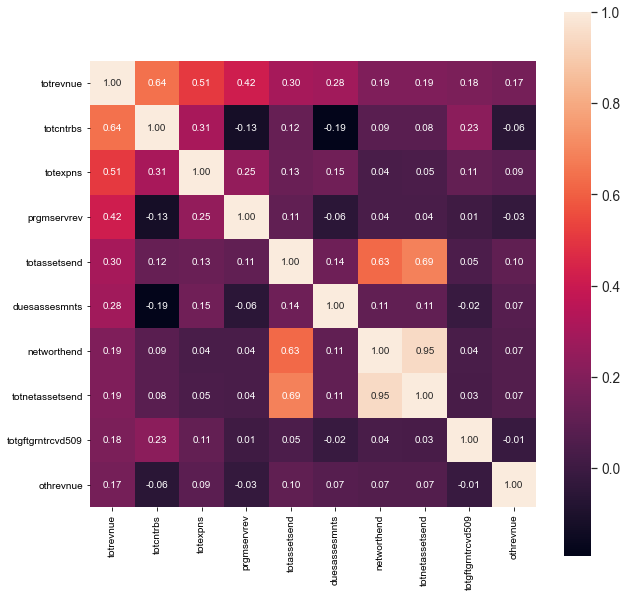

In [6]:
'''It is a good idea to start by looking at features that are highly correlated with total revenue in the dataset'''

correlation = df.corr()

#correlation matrix

fig, ax = plt.subplots(figsize=(10, 10))

k = 10 #number of variables for heatmap
cols = correlation.nlargest(k, 'totrevnue')['totrevnue'].index

cm = np.corrcoef(df[cols].values.T)

sns.set(font_scale=1.25)
fig = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

- It can be seen that totrevnue is correlated with totcntrbs (total contributions) and totexpns (total expenses)

## Some rudimentary data visualization

In [7]:
# Using interquartile range to find and remove outliers for some basic visualization
# I tried without removing the outliers but the visualizations become a little too unmanageable to look at

columns = ['totrevnue', 'totcntrbs', 'totexpns']
for i in columns:

    Q1 = np.percentile(df[str(i)], 25,
                       interpolation = 'midpoint')
 
    Q3 = np.percentile(df[str(i)], 75,
                       interpolation = 'midpoint')
    IQR = Q3 - Q1

    print("Old Shape: ", df.shape)

    # Upper bound
    upper = np.where(df[str(i)] >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(df[str(i)] <= (Q1-1.5*IQR))

    #Removing the Outliers

    try:
        df.drop(upper[0], inplace = True)
        df.drop(lower[0], inplace = True)
    except KeyError:
        print('Already removed')

    print("New Shape: ", df.shape)
    

Old Shape:  (218733, 72)
New Shape:  (217402, 72)
Old Shape:  (217402, 72)
Already removed
New Shape:  (217402, 72)
Old Shape:  (217402, 72)
Already removed
New Shape:  (217402, 72)


[Text(0.5, 1.0, 'Total revenue vs total contributions received')]

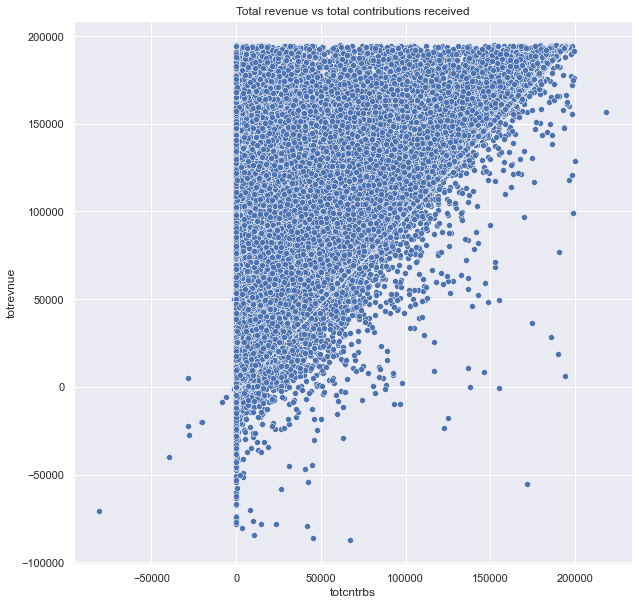

In [8]:
sns.set(rc={"figure.figsize":(10, 10)})
sns.scatterplot(data = df, x='totcntrbs', y='totrevnue').set(title='Total revenue vs total contributions received')

- From the above visualization it can be seen that there is a presence of a large number of organizations whose total revenue and total contributions is perfectly correlated, suggesting that that is their only revenue stream.

- It can also be seen that there is a presence of a number of organizations whose contributions fall under 0 but with high revenue

    - And majority of the non-profits in between the first two types discussed.

- And finally it can be seen that there are a lots of organizations who receive a lot more contributions than their total revenue, implying losses are being made somehow (some even showing negative revenue).

This is already a good starting point for indicating the financial health of these non-profits.

[Text(0.5, 1.0, 'Total revenue vs total expenses')]

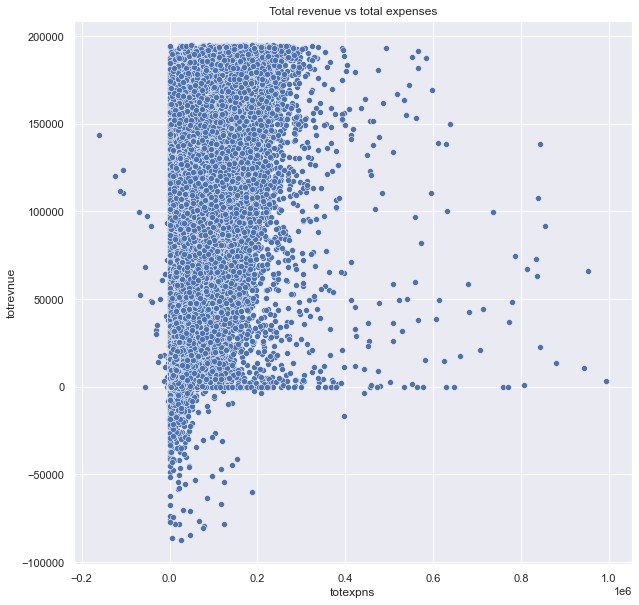

In [9]:
df = df[df.totexpns < 1*1e6] #removing some extra outliers

sns.set(rc={"figure.figsize":(10, 10)})
sns.scatterplot(data = df, x='totexpns', y='totrevnue').set(title='Total revenue vs total expenses')

In [10]:
df['profit'] = df.totrevnue - df.totexpns

perc = ((df.profit > -1).sum() / len(df) * 100)

print(str(perc) + "% of the non-profit organizations present in this dataset either breaks even or has profited.")
print("On average, these organizations have a total revenue of " + str(df.totrevnue.mean()) + 
      " and a total expenses of " + str(df.totexpns.mean()) + ".")

60.25080734940978% of the non-profit organizations present in this dataset either breaks even or has profited.
On average, these organizations have a total revenue of 55722.447694798924 and a total expenses of 51848.262101040586.


## Where to go from here

This dataset gives valuable insight to the financial state of all these non-profit organizations and the analysis done above is very rudimentary and should be considered as just a starting point. This analysis can be further expanded by looking at and analyzing the data on companies' assets and liabilities, investments, public support metrics (all of which are already included in the dataset).

In the interest of time and lack of computing power, I did not attempt this but the IRS website has the returns data for all years dating back to 2012. This historical data can be leveraged to look at the trends from the past and potentially see where it can go in the future possibly using time series or regression analysis. This can also be further expanded on by not just looking at the health of individual organizations and finding the ones in great shape but also it can be used to look at the overall macro health of the non-profit ecosystem as well (especially when considering the EOBMF datasets covers every region in the USA and multiple international regions too). This can provide very important insight as to how the ecosystem changes due to prominent events such as the COVID-19 pandemic.